In [243]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
df = pd.read_csv('Chocolate Sales.csv')
#Understand the data make changes where necessary for analyzing
#print(df.Product.unique())
print(df.Country.unique())
print(df['Sales Person'].nunique())

#df['Amount'] = df['Amount'].str.strip('$').str.strip(' ').str.replace(',', '').astype(int)

#change Date to datetime 
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.rename(columns = {'Boxes Shipped' : 'Boxes_Shipped'}, inplace=True)

print(df.dtypes)
#Questions:
#Which country ships the most boxes? Can it be visualized?
#Which sales person sells the most? Can it be visualized?


['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']
25
Sales Person     object
Country          object
Product          object
Date             object
Amount            int64
Boxes_Shipped     int64
Year              int64
Month             int64
dtype: object
Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                    int64
Boxes_Shipped             int64
Year                      int32
Month                     int32
dtype: object


       Country  Boxes_Shipped
0    Australia     159.253659
1       Canada     178.405714
2        India     160.163043
3  New Zealand     153.641618
4           UK     170.028090
5          USA     149.854749


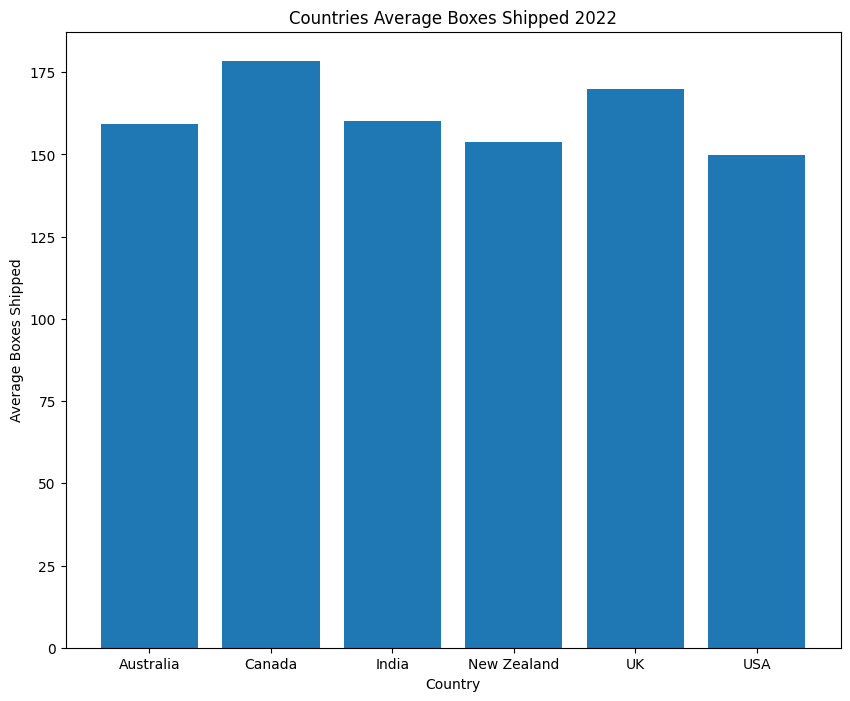

In [244]:
df_grouped = df.groupby('Country')['Boxes_Shipped'].mean().reset_index()
print(df_grouped)
plt.figure(figsize=(10,8))
plt.bar(df_grouped.Country, df_grouped['Boxes_Shipped'])
plt.xlabel('Country')
plt.ylabel('Average Boxes Shipped')
plt.title('Countries Average Boxes Shipped 2022')
plt.show()

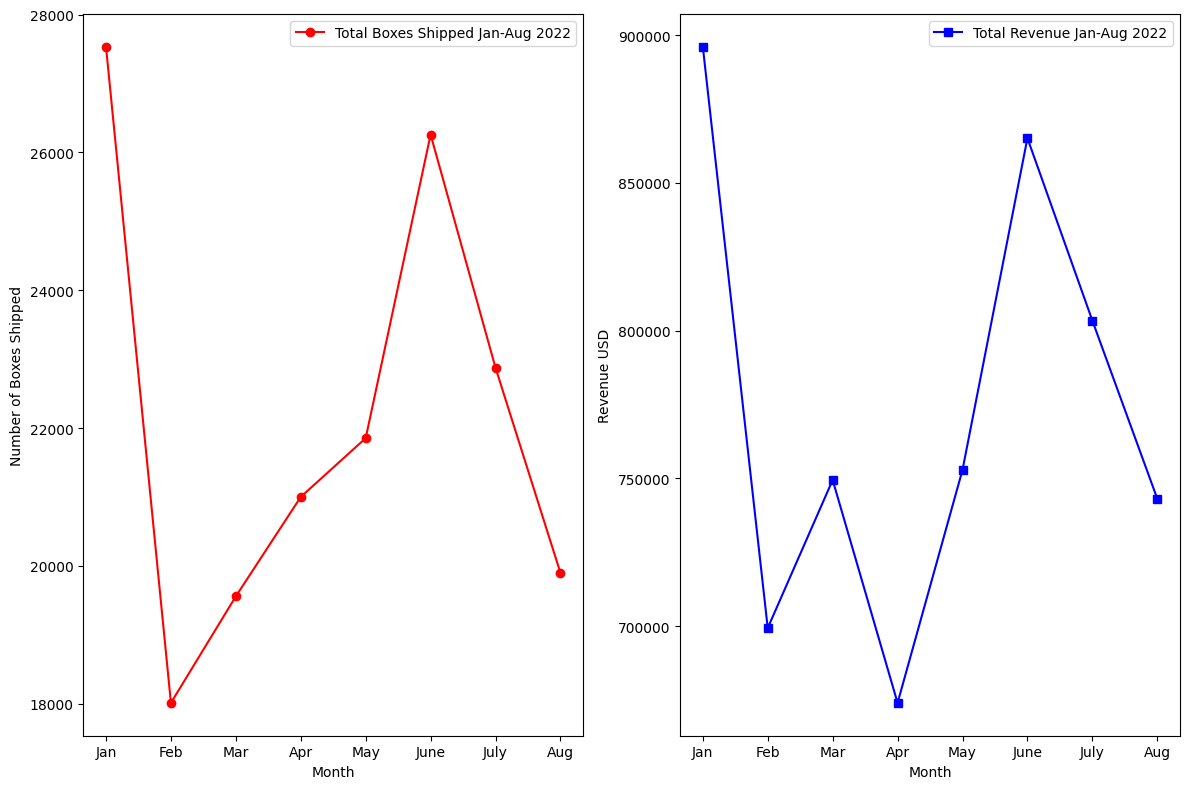

In [245]:
month = df.groupby('Month')['Boxes_Shipped'].sum().reset_index()
revenue = df.groupby('Month')['Amount'].sum().reset_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug']
fig, axs = plt.subplots(1, 2, figsize=(12,8)) 
axs[0].plot(month.Month, month['Boxes_Shipped'], marker='o', color='r', label='Total Boxes Shipped Jan-Aug 2022')
axs[0].set_xticks(range(1,9))
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Boxes Shipped')
axs[0].set_xticklabels(months)
axs[0].legend(loc='best')

axs[1].plot(revenue.Month, revenue.Amount, marker='s', color='b', label='Total Revenue Jan-Aug 2022')
axs[1].set_xticks(range(1,9))
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Revenue USD')
axs[1].set_xticklabels(months)
axs[1].legend(loc='best')
plt.tight_layout()
plt.show()

#This is a revealing comparison because it shows in March there were less boxes shipped than April and yet March had a higher yield of revenue.
#While the other months match up pretty perfect Revenue to boxes shipped this is an anomoly between March and April and should be investigated further.

                 Product  Amount_ap  Amount_ma  Difference
0         50% Dark Bites      47789      45241        2548
1         70% Dark Bites      31920      20755       11165
2          85% Dark Bars      36414       7917       28497
3        99% Dark & Pure       7483      12418       -4935
4            After Nines      52437      35392       17045
5           Almond Choco      26320      24549        1771
6    Baker's Choco Chips      37737      22477       15260
7   Caramel Stuffed Bars      34111      14182       19929
8   Choco Coated Almonds      24801      44730      -19929
9          Drinking Coco      14455      43974      -29519
10               Eclairs      45794      56413      -10619
11      Fruit & Nut Bars      29904      19740       10164
12    Manuka Honey Choco      39004      35378        3626
13             Milk Bars      11410      42189      -30779
14       Mint Chip Choco      13160      33467      -20307
15          Orange Choco      48188      41573        66

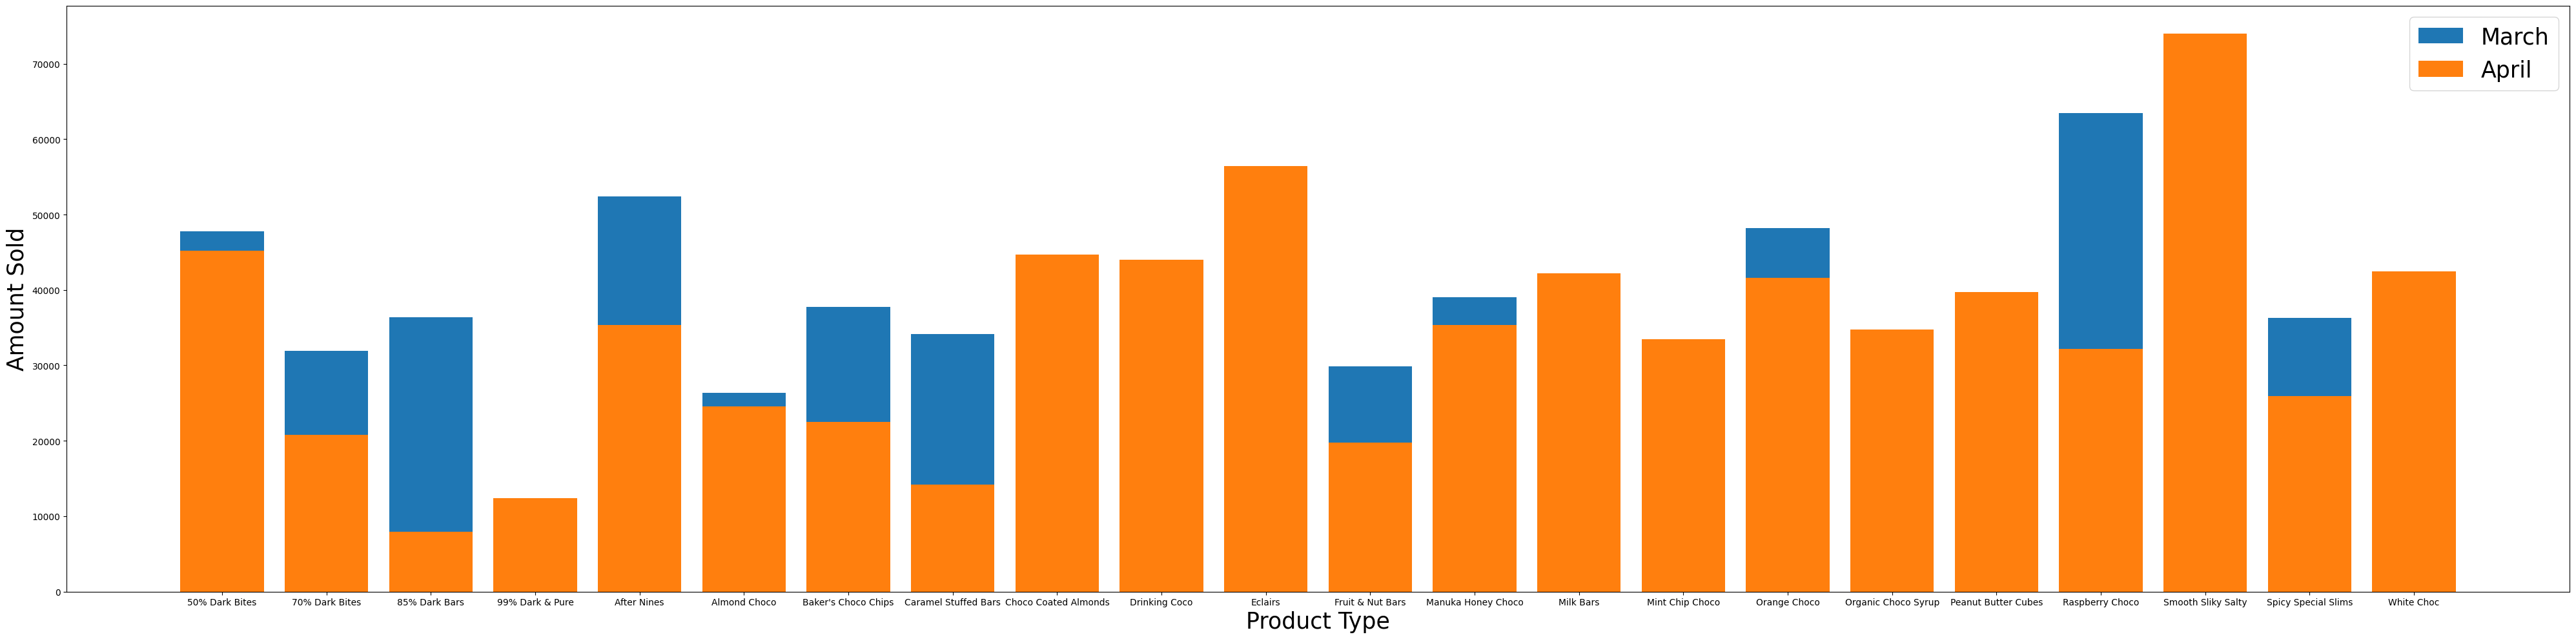

In [249]:
# Why is there more revenue in March than April?
#The next column to bring in is product.
april = df[df['Month'] == 4]
march = df[df['Month'] == 3]
rev_april = april.groupby('Product')['Amount'].sum().reset_index()
rev_march = march.groupby('Product')['Amount'].sum().reset_index()
march_april = pd.merge(rev_april, rev_march, on='Product', suffixes=('_ap', '_ma'))
march_april['Difference'] = march_april['Amount_ap'] - march_april['Amount_ma']
print(march_april)
#Visualize findings:
plt.figure(figsize=(40,10))
ax = plt.subplot()
plt.bar(march_april.Product, march_april.Amount_ap)
plt.bar(march_april.Product, march_april.Amount_ma)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels())
plt.xlabel('Product Type', fontsize=25)
plt.ylabel('Amount Sold', fontsize=25)
plt.legend(['March', 'April'], loc='best', fontsize=25)
plt.tight_layout()
plt.show()


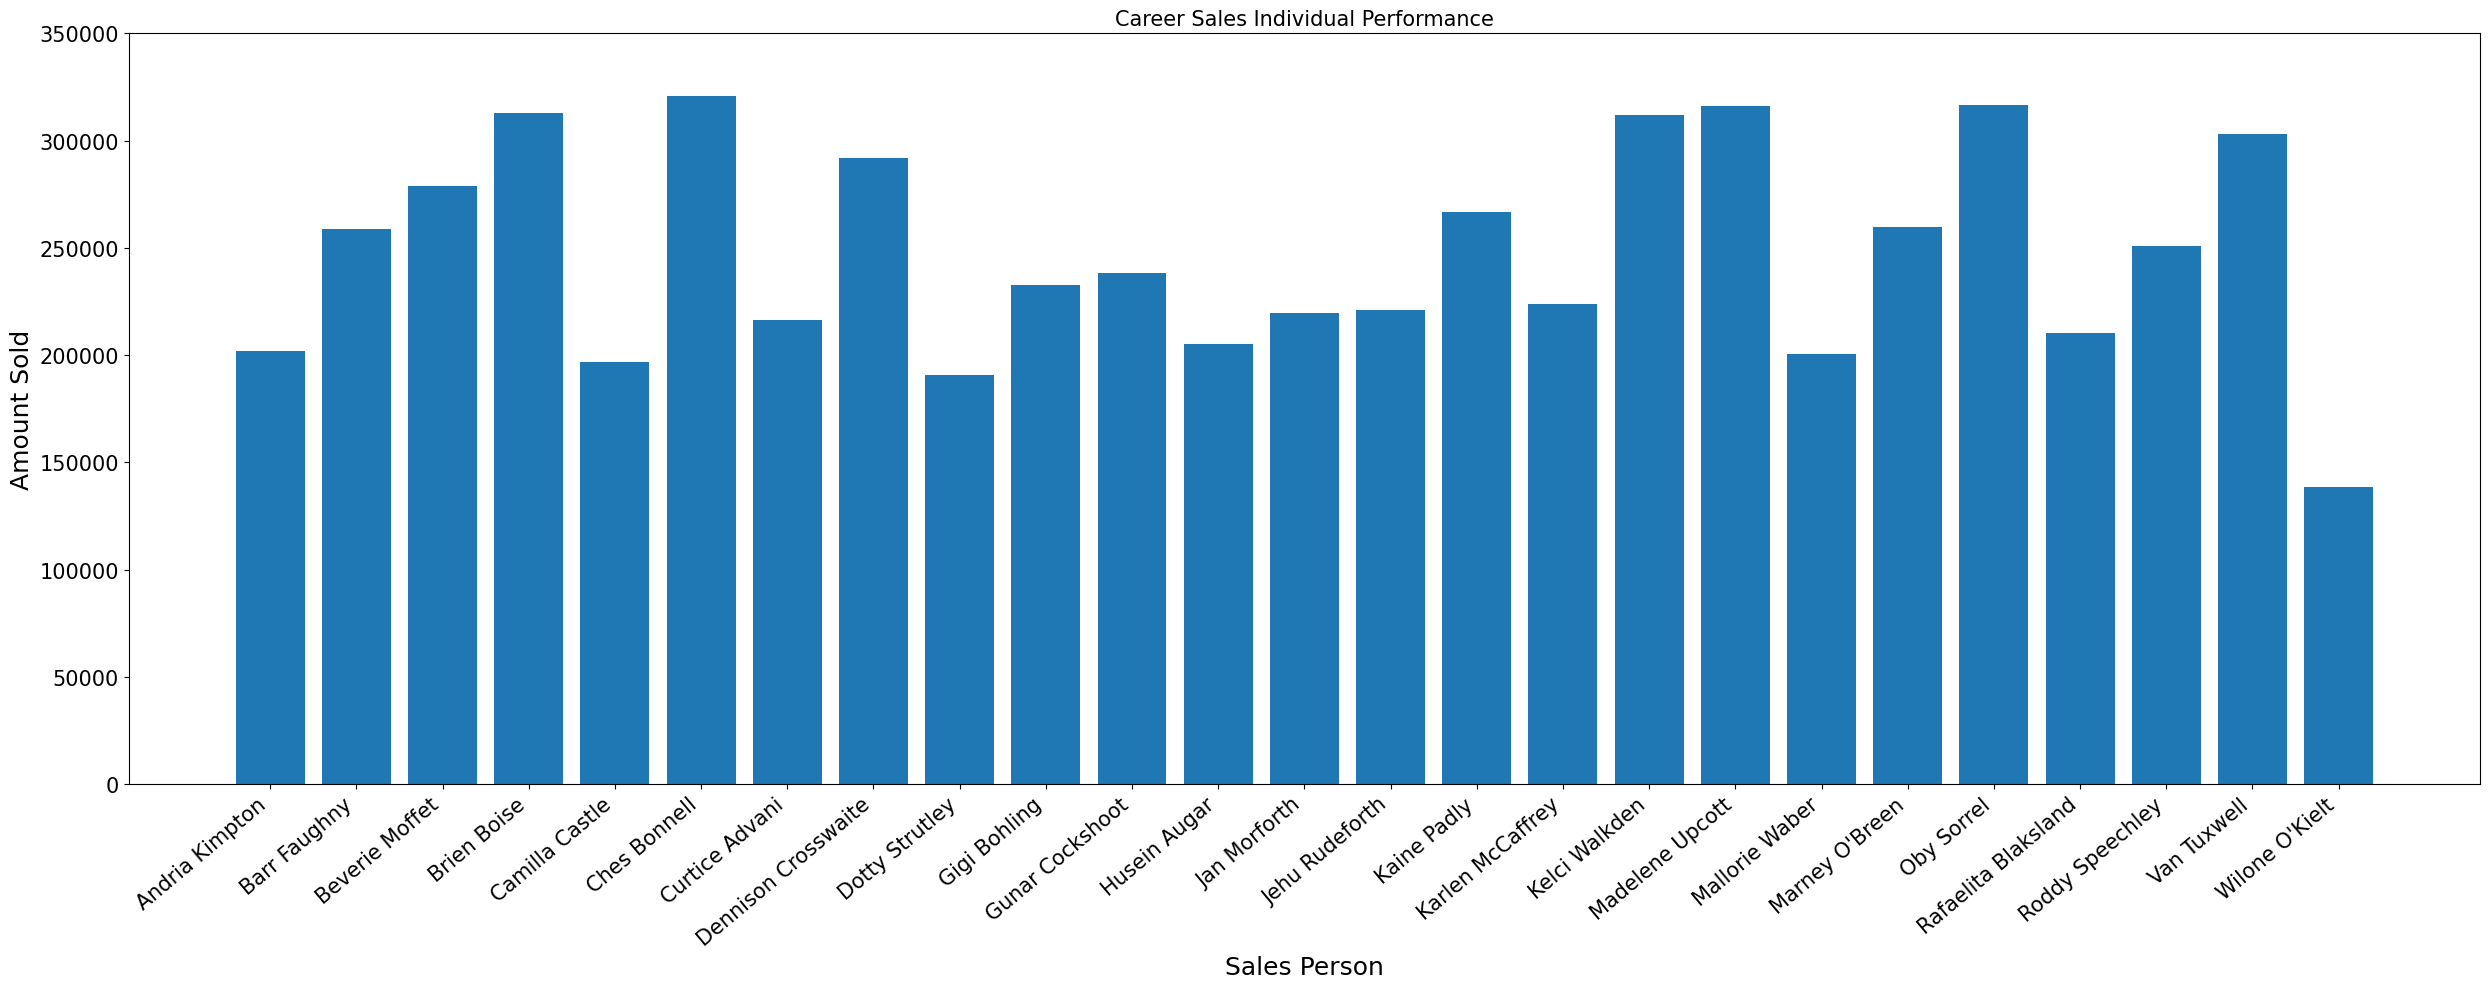

<Figure size 640x480 with 0 Axes>

In [247]:
#Top sales people and what are there amounts?
#Can it be visualized?
people = df.groupby('Sales Person')['Amount'].sum().reset_index()
plt.figure(figsize=(25,10))
ax = plt.subplot()
plt.bar(people['Sales Person'], people['Amount'])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=40, ha='right')
plt.xlabel('Sales Person', fontsize=18)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, ha='right')
plt.ylabel('Amount Sold', fontsize=18)
plt.title('Career Sales Individual Performance', fontsize=15, loc='center')
plt.tight_layout()
plt.show()
plt.clf()

In [248]:
#Export updated csv for Tableau
df.to_csv('Chocolate Sales.csv', index=False)